In [5]:
#importing keras ,np,plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Constants
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32
EPOCHS = 1
TRAIN_DATA_DIR = '/kaggle/input/fer2013/train'
VALIDATION_DATA_DIR = '/kaggle/input/fer2013/test'
CLASS_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Datagenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

# Model architecture
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(CLASS_LABELS), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Model training
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE)

# Saving the model
model.save('emotion_detection_model.h5')# Loading the model

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
897/897 [==============================] - 62s 67ms/step - loss: 1.8127 - accuracy: 0.2494 - val_loss: 1.7745 - val_accuracy: 0.2596


1/1 [==============================] - 0s 131ms/step
Number of trainable parameters: 155399


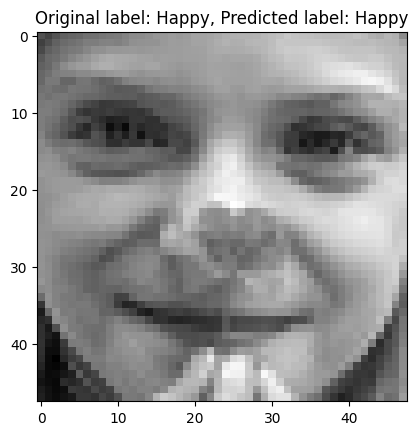

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 23, 23, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 10, 10, 32)       

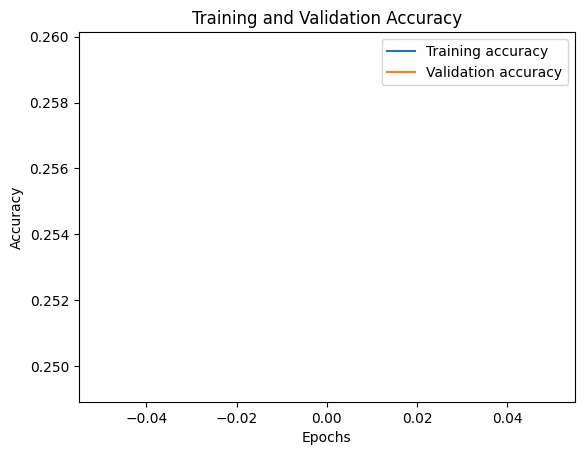

Number of trainable parameters: 155399


In [6]:
my_model = load_model('emotion_detection_model.h5')

# Displaying a sample of test images with predicted labels
test_img, test_lbl = validation_generator.__next__()
predictions = my_model.predict(test_img)
print("Number of trainable parameters:", model.count_params())
for i in range(test_img.shape[0]):
    orig_label = CLASS_LABELS[np.argmax(test_lbl[i])]
    pred_label = CLASS_LABELS[np.argmax(predictions[i])]
    
    if orig_label == pred_label:
        image = test_img[i]
        plt.imshow(image[:,:,0], cmap='gray')
        plt.title("Original label: " + orig_label + ", Predicted label: " + pred_label)
        plt.show()
        break 

model.summary()

# Ploting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Printing the number of trainable parameters in the model
print("Number of trainable parameters:", model.count_params())
#tp-150399
#acc-0.52-25 epoch  